In [1]:
import os
import mat73  #install with pip install mat73
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
class import_file(): 
    def __init__(self,folder_path,file_name):
        self.folder_path=folder_path
        self.file_name=file_name
        self.path=os.path.join(folder_path,file_name)
        #importing the WHOLE file
        self.data = mat73.loadmat(self.path)

    def get_adjusted_data(self):
        '''
        Function to extract the adjusteted data from an
        imported file. 

        returns: 
            data: dict
                keys are sensor names. each key contains three time series.
                x, y and z accelerations 
        '''
        ad_data={}
        for component in self.data.get('recording').get('sensor'):
            key=component.get('sensor_name')
            if key[0]=='H': #skips the wind
                sens=component.get('component')
                data=sens.get('adjusted_data')
                out=np.array([data[0][0],data[1][0],data[2][0]])
                ad_data[key]=out
        return ad_data

    def get_raw_data(self):
        '''
        Function to extract the raw data from an
        imported file. 

        returns: 
            data: dict
                keys are sensor names. each key contains three time series.
                x, y and z accelerations 
        '''
        rw_data={}
        for component in self.data.get('recording').get('sensor'):
            key=component.get('sensor_name')
            if key[0]=='H': #skips the wind
                sens=component.get('component')
                data=sens.get('raw_data')
                out=np.array([data[0][0],data[1][0],data[2][0]])
                rw_data[key]=out
        return rw_data
    
    def get_component_atr(self,atr): 
        pass

    def convert(self):
        self.component_atr_to_transfer=[
        'component_no',
        'data_quality',
        'mean',
        ]
        new_ts=create_simple_ts()
        data_dict={}
        for sensor in self.data.get('recording').get('sensor'):
            sensor_name=sensor.get('sensor_name').replace(' ','_')
            if sensor_name[0]=='H': #skips the wind
                # transferring the data for each senor
                component=sensor.get('component')
                adjusted_data=component.get('adjusted_data')
                for i,dir in enumerate(['_x','_y','_z']):
                    comp_name=sensor_name+dir
                    data_dict[comp_name]=np.array(
                        adjusted_data[i][0])
                    new_ts.sensor_metadata[comp_name]={}
                    # transfering sensor metadata
                    for atr in self.component_atr_to_transfer:
                        new_ts.sensor_metadata[
                            comp_name][atr]=component.get(atr)[i]
                        # print(component.get(atr)[i])
                    new_ts.sensor_metadata[comp_name][
                        'adjusted_samplerate']=sensor.get(
                            'adjusted_samplerate')
        # setting the metadata for the whole series: 
        new_ts.series_metadata['file_name']=self.file_name[:-4]
        new_ts.set_atr('ac_data',data_dict)

        return new_ts
                
        

In [4]:
data=import_file('../../test_data_hardanger/','HB141M-2013-12-05_00-56-08.mat')
ad=data.get_adjusted_data()
print(ad.keys())
print(ad.get('H1 East'))


dict_keys(['H1 East', 'H1 Vest', 'H2 Vest', 'H3 East', 'H3 Vest', 'H4 East', 'H4 Vest', 'H5 East', 'H5 Vest', 'H6 East', 'H6 Vest', 'H7 East', 'H7 Vest', 'H8 East', 'H9 East', 'H9 Vest', 'H10 East', 'H10 Vest', 'H11 East', 'H11 Vest'])
[[       nan        nan        nan ... 0.00395013 0.00399995 0.00373299]
 [       nan        nan        nan ... 0.01982222 0.01971038 0.0201329 ]
 [       nan        nan        nan ... 0.01788395 0.01732747 0.01636748]]


In [5]:
#################
new_ts=create_simple_ts()
test=data.convert()
print(test.series_metadata['file_name'])

NameError: name 'create_simple_ts' is not defined

In [ ]:
test.save('../test_data_hardanger/testing/')

In [ ]:
def import_converted_ts(path,name): 
    if name[-4:]=='.pkl':
        tot_path=path+name
    else: tot_path=path+name+'.pkl'
    with open(tot_path, "rb") as file:
        return pickle.load(file)

In [ ]:
test_in=import_converted_ts('../test_data_hardanger/testing/','HB141M-2013-12-05_00-56-08')
print(type(test_in))

<class '__main__.create_simple_ts'>


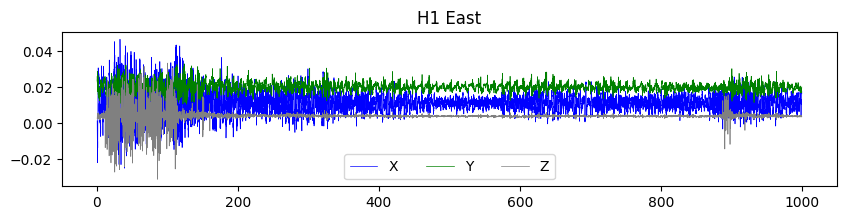

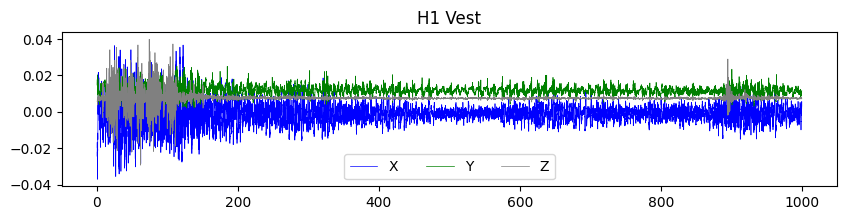

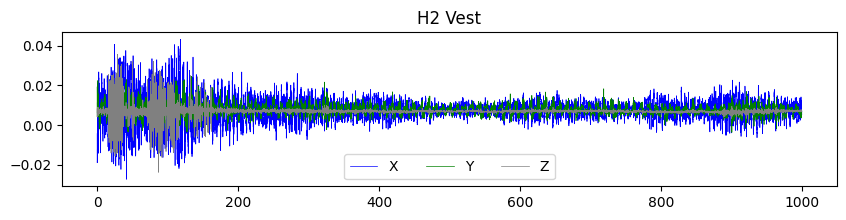

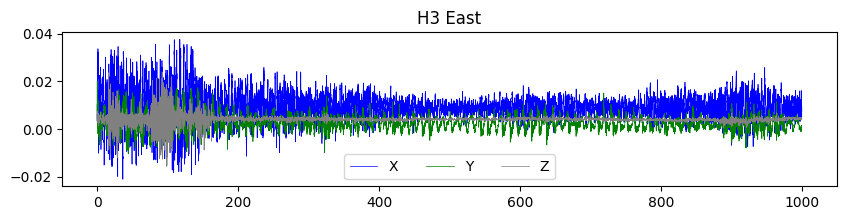

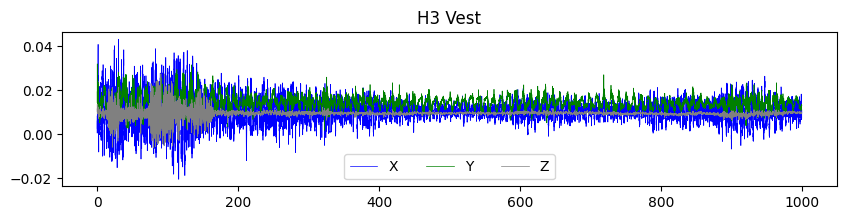

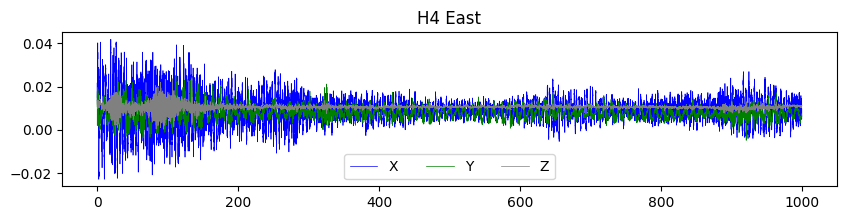

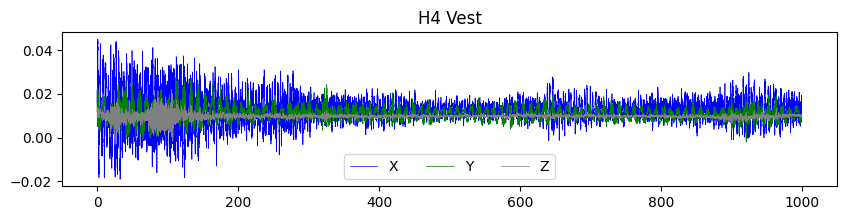

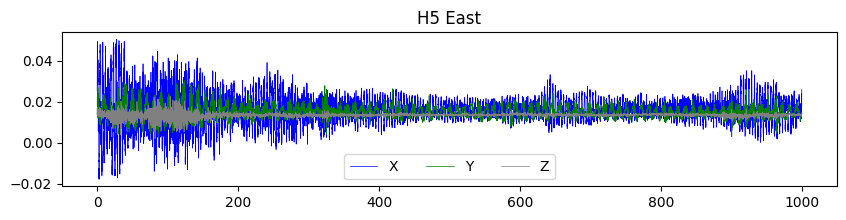

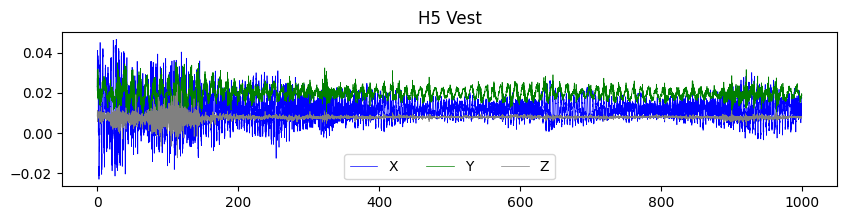

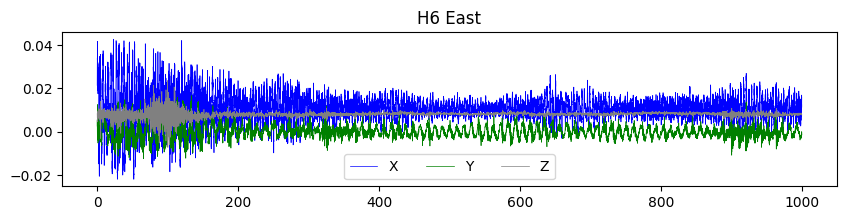

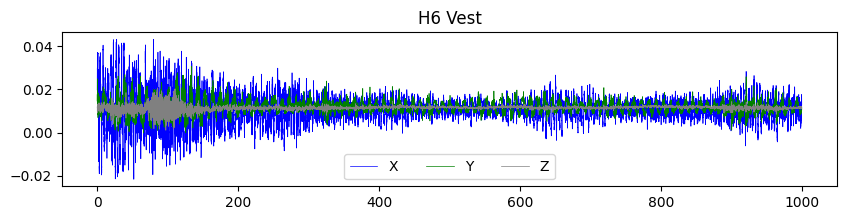

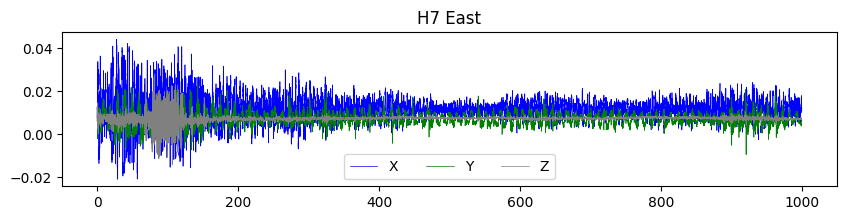

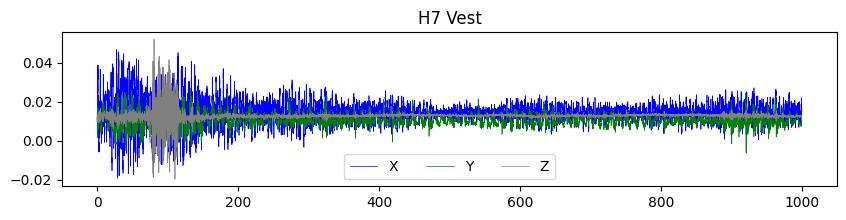

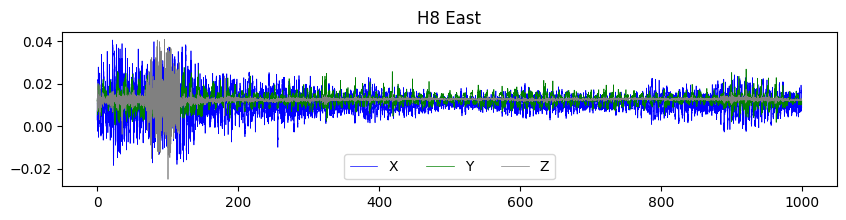

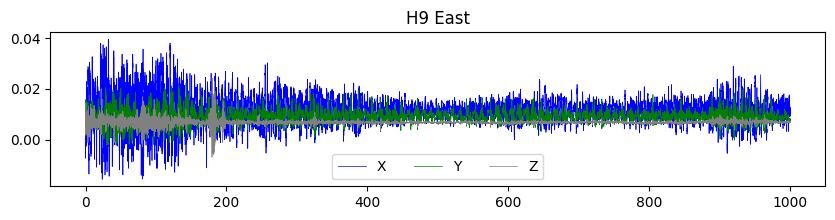

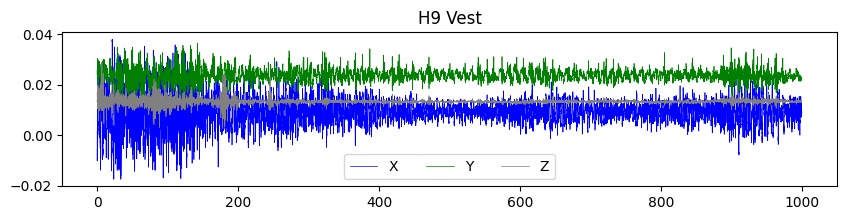

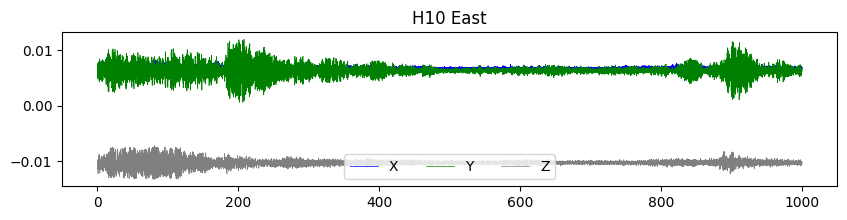

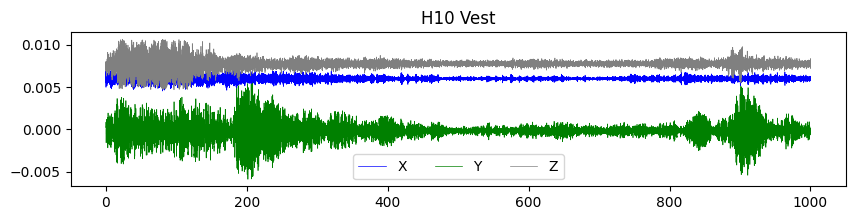

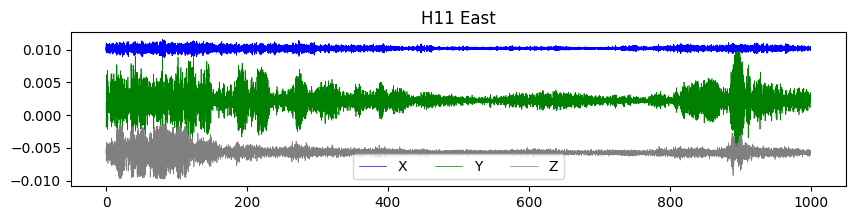

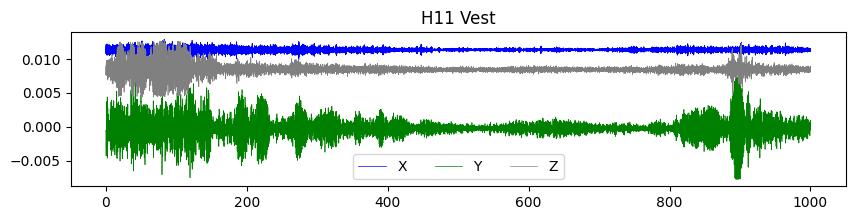

In [ ]:
for key in ad.keys():
    plt.figure(figsize=(10,2))
    plt.title(str(key))
    plt.plot(np.linspace(0,1000,len(ad.get(key)[2])),ad.get(key)[2],color='blue',label='X',linewidth=0.5)
    plt.plot(np.linspace(0,1000,len(ad.get(key)[1])),ad.get(key)[1],color='green',label='Y',linewidth=0.5)
    plt.plot(np.linspace(0,1000,len(ad.get(key)[0])),ad.get(key)[0],color='grey',label='Z',linewidth=0.5)
    plt.legend(loc='lower center',ncols=3)
    plt.show()
    plt.close()

    

In [ ]:
raw_data=data.get_raw_data()
print(ad.keys())
print(ad.get('H1 East'))

dict_keys(['H1 East', 'H1 Vest', 'H2 Vest', 'H3 East', 'H3 Vest', 'H4 East', 'H4 Vest', 'H5 East', 'H5 Vest', 'H6 East', 'H6 Vest', 'H7 East', 'H7 Vest', 'H8 East', 'H9 East', 'H9 Vest', 'H10 East', 'H10 Vest', 'H11 East', 'H11 Vest'])
[[       nan        nan        nan ... 0.00395013 0.00399995 0.00373299]
 [       nan        nan        nan ... 0.01982222 0.01971038 0.0201329 ]
 [       nan        nan        nan ... 0.01788395 0.01732747 0.01636748]]


c:\Users\olebj\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


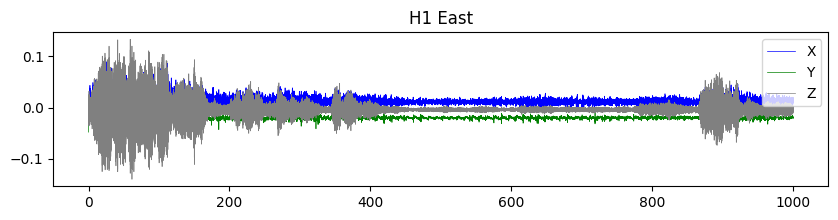

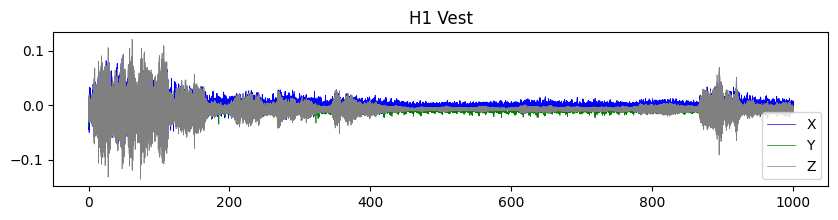

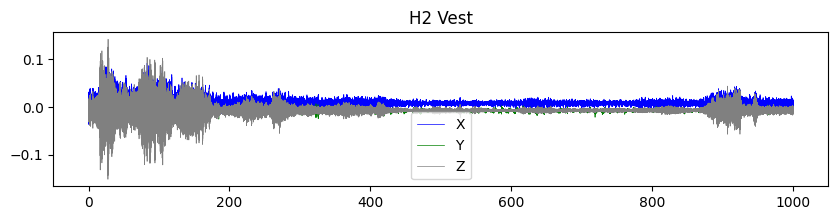

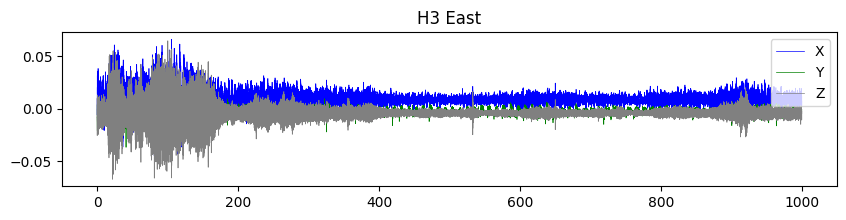

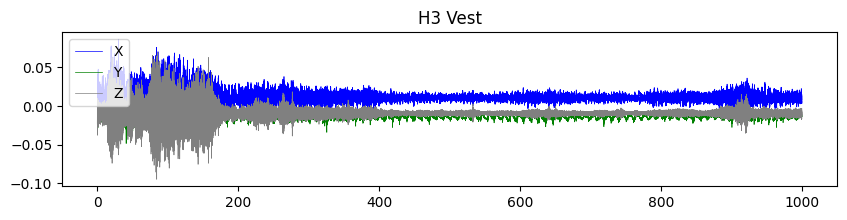

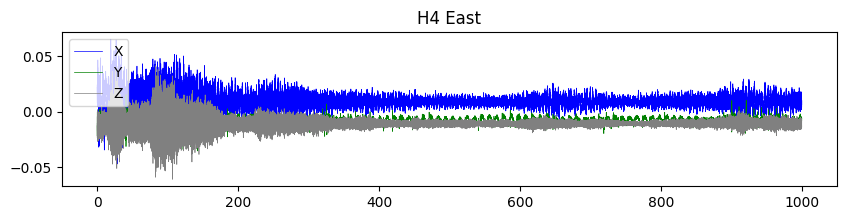

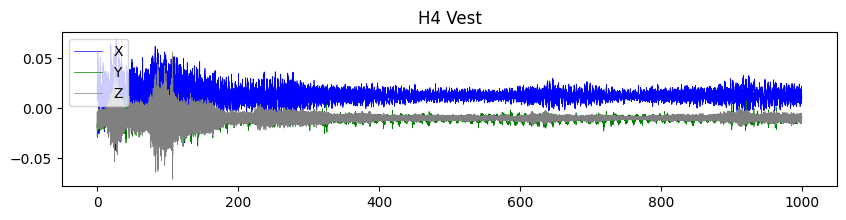

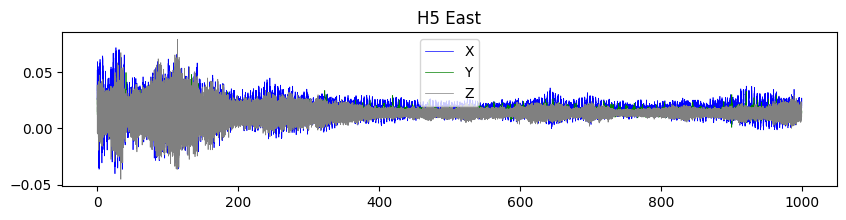

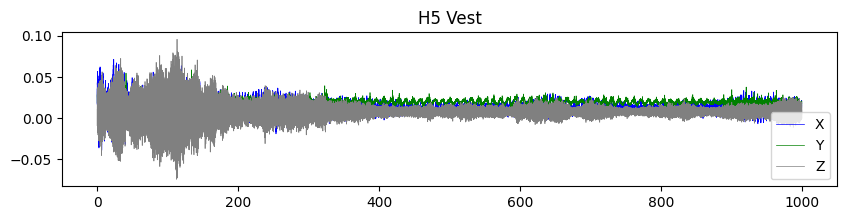

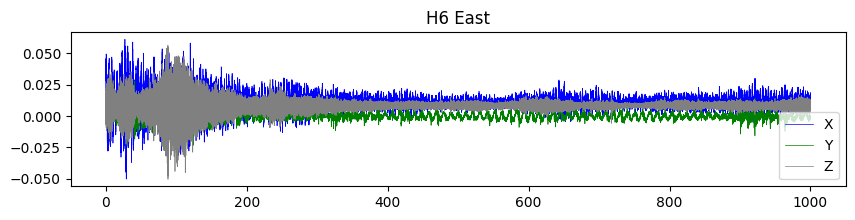

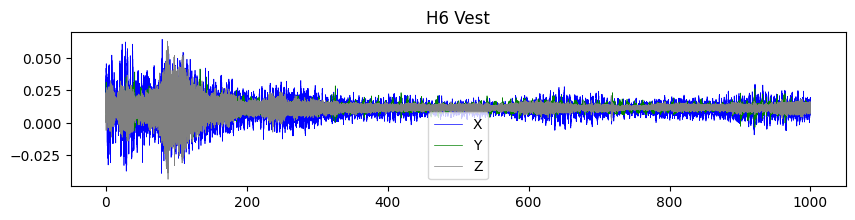

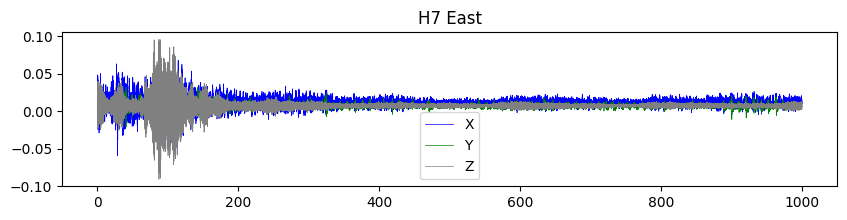

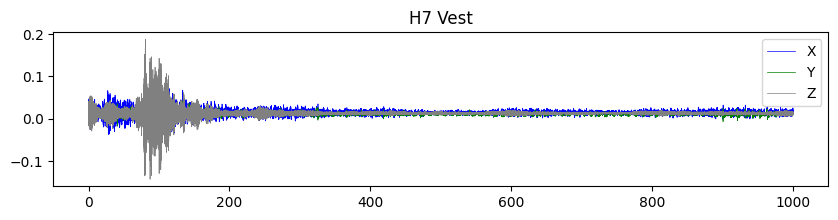

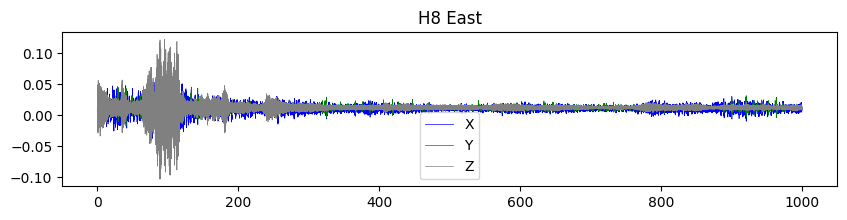

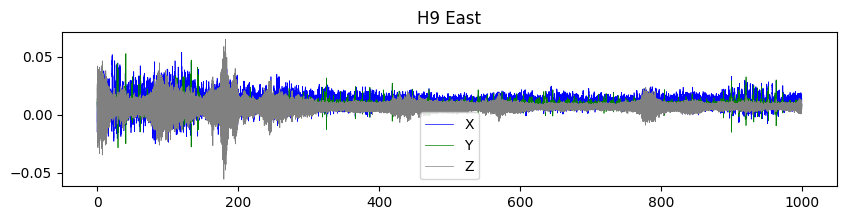

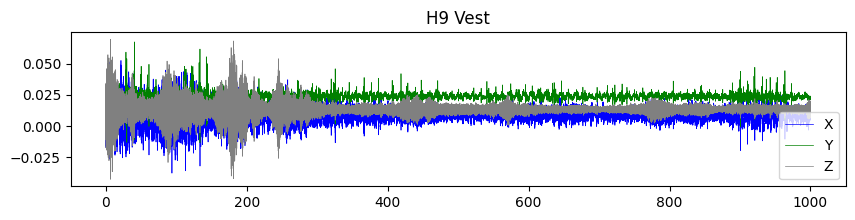

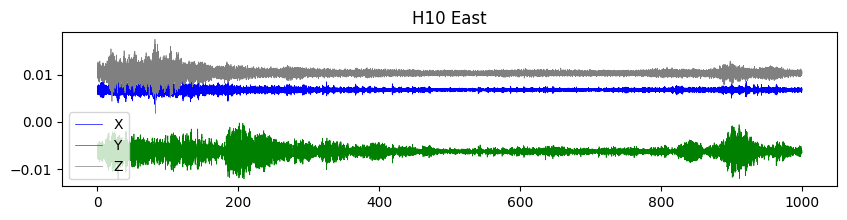

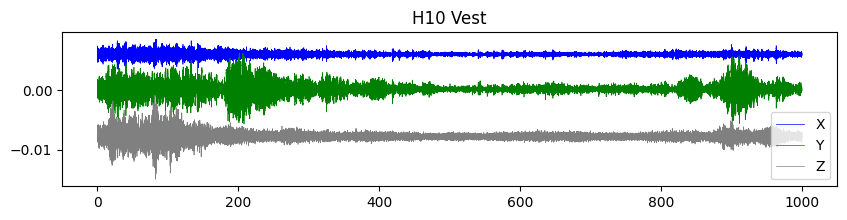

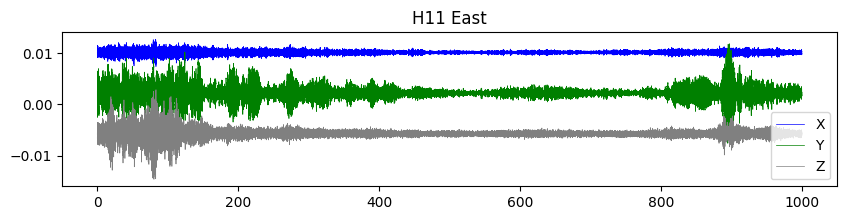

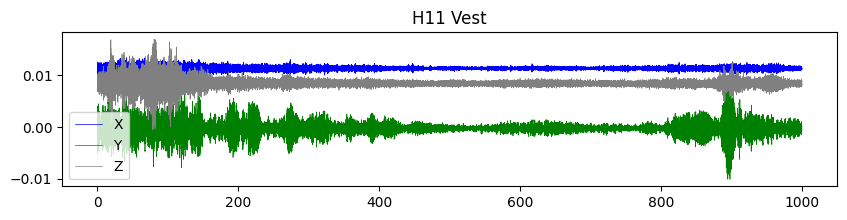

In [ ]:
for key in raw_data.keys():
    plt.figure(figsize=(10,2))
    plt.title(str(key))
    plt.plot(np.linspace(0,1000,len(raw_data.get(key)[2])),raw_data.get(key)[2],color='blue',label='X',linewidth=0.5)
    plt.plot(np.linspace(0,1000,len(raw_data.get(key)[1])),raw_data.get(key)[1],color='green',label='Y',linewidth=0.5)
    plt.plot(np.linspace(0,1000,len(raw_data.get(key)[0])),raw_data.get(key)[0],color='grey',label='Z',linewidth=0.5)
    plt.legend(loc='lower canter', ncols=3)
    plt.show()
    plt.close()

##################################################

In [ ]:
class create_simple_ts():
    '''Class for creating a new object from 
    data extracted with "import_file". '''
    def __init__(self):
        self.sensor_metadata={}
        self.series_metadata={}

    def set_general_metadata(self,key,value): 
        self.series_metadata[key]=value
        
    def get_from_general_metadata(self,key):
        if key in self.series_metadata.keys():
            return self.series_metadata.get(key)
        else: return None

    def set_atr(self,attribute_name,sensor_data):
        setattr(self,attribute_name,sensor_data)

    def save(self,path):
        
        tot_path=path+self.series_metadata['file_name']+'.pkl'
        with open(tot_path, 'wb') as fout:
            pickle.dump(self, fout)
        

Annen test: 

In [ ]:
test2=create_simple_ts()
print(test2.sensor_metadata)

{}


NameError: name 'mat' is not defined

../test_data_hardanger/HB141M-2013-12-05_00-56-08.mat contains the following vars:
  #refs#
  recording
  recording/general
  recording/general/comments
  recording/general/coordinate_system
  recording/general/datalogger
  recording/general/datenumber
  recording/general/duration
  recording/general/geographic_location
  recording/general/latitude
  recording/general/longitude
  recording/general/origin
  recording/general/postlen
  recording/general/prelen
  recording/general/recording
  recording/general/references
  recording/general/samplerate
  recording/general/sensor_setup
  recording/general/sensor_setup/report
  recording/general/sensor_setup/valid_from
  recording/general/sensor_setup/valid_to
  recording/general/starttime
  recording/general/structure_name
  recording/general/structure_type
  recording/general/title
  recording/general/trigcode
  recording/general/x_axis
  recording/general/y_axis
  recording/general/z_axis
  recording/sensor
  recording/sensor/active_compo

dict_keys(['recording'])
dict_keys(['sensor'])
28
